TOC

1. Load Iris Dataset
2. Boxplot for Each Target
3. ANOVA and Tukey's HSD Tests
4. PCA Dimensionality Reduction
5. Simple Machine Learning Correlations
6. Correlation Coefficients Heatmap and Pairplot

### Summary

This exercise demonstrates exploratory data analysis on the well-known, open-source Iris dataset. It begins with loading the dataset from the scikit-learn package and converting it into a pandas DataFrame with appropriate column headings.

The data is then visualized using boxplots to show the distribution of each feature, including sepal width, sepal length, petal width, and petal length. ANOVA and Tukey's HSD tests are conducted to determine if the means of these features differ significantly across species.

PCA is performed to reduce the dataset's dimensionality, identifying the most significant features and visualizing them with an explained variance plot. Additionally, machine learning techniques are used to calculate feature importance and correlation coefficients, and a pairplot is generated to explore relationships between features, all aimed at understanding the dataset's structure and separability.

### 1. Load Iris Dataset

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 2. Boxplot for Each Target

By examining the boxplots for each feature grouped by target species, you can identify which features have distinct distributions across species, indicating their potential usefulness in classification tasks.

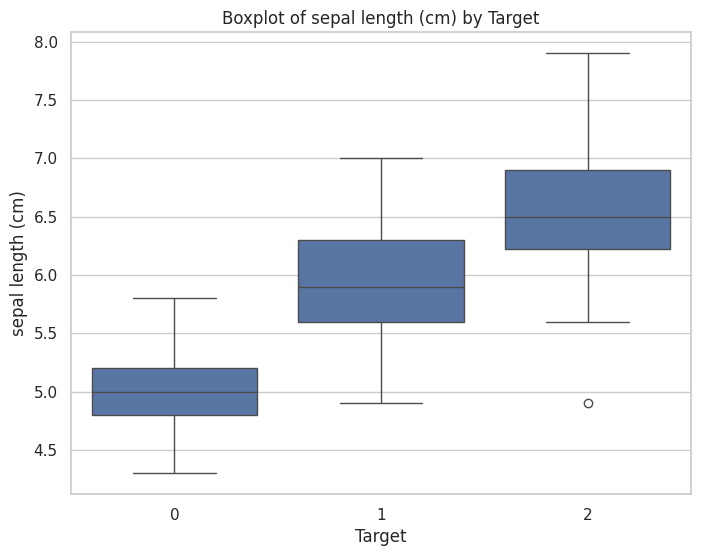

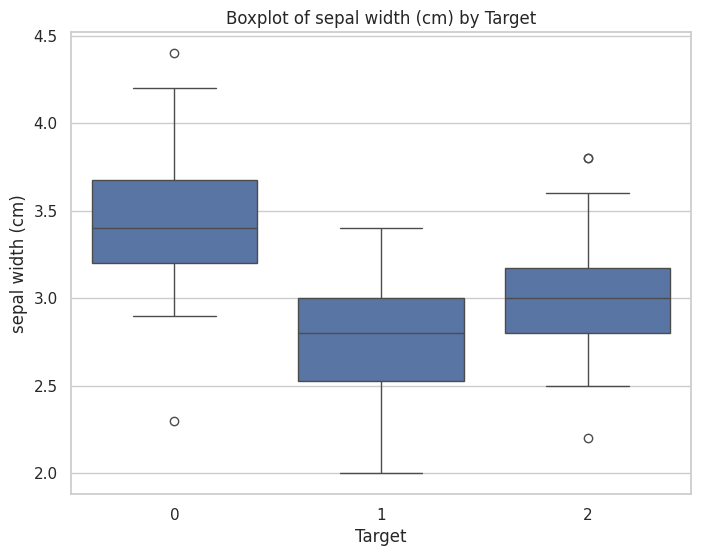

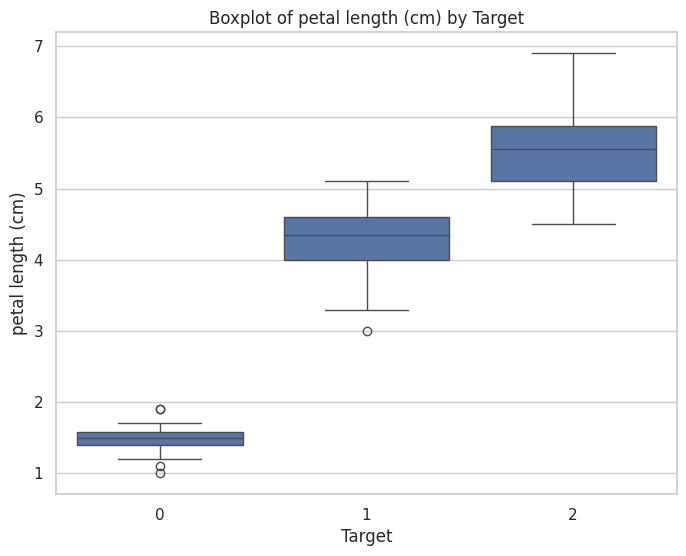

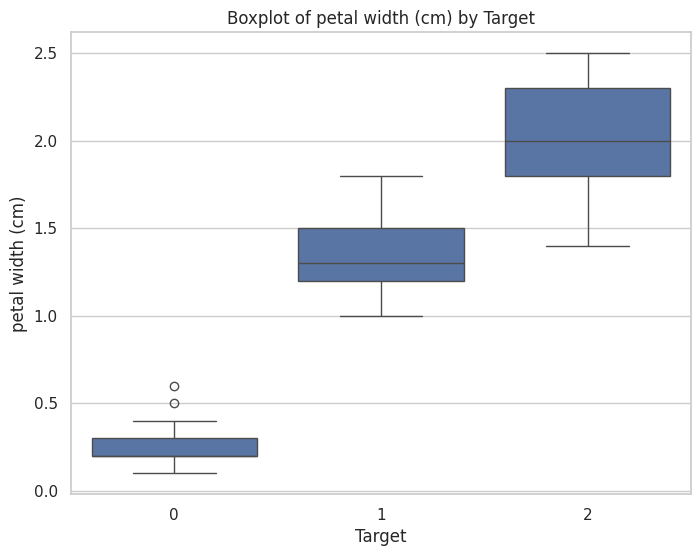

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create boxplots for each feature
for column in iris_df.columns[:-1]:  # Exclude the target column
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=column, data=iris_df)
    plt.title(f'Boxplot of {column} by Target')
    plt.xlabel('Target')
    plt.ylabel(column)
    plt.show()

### 3. ANOVA and Tukey's HSD Tests

Assess whether there are statistically significant differences in the means of a feature across different groups (species, in this case) using ANOVA and Tukey's HSD.

ANOVA (Analysis of Variance) tests whether there are statistically significant differences in the means of three or more groups, but it doesn't specify which groups differ.

Tukey's HSD (Honestly Significant Difference) test is a post-hoc analysis used after ANOVA to identify which specific pairs of group means are significantly different, providing detailed pairwise comparisons.

In [18]:
import pandas as pd
from sklearn.datasets import load_iris
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Rename columns to remove spaces and parentheses
iris_df.columns = [col.replace(' ', '_').replace('(', '').replace(')', '') for col in iris_df.columns]

# Define length features
length_features = ['sepal_length_cm', 'petal_length_cm']

# Perform Tukey's HSD test for each length feature
for feature in length_features:
    # Perform ANOVA first
    model = sm.formula.ols(f'{feature} ~ C(target)', data=iris_df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA for {feature}:\n', anova_table, '\n')

    # Perform Tukey's HSD test
    tukey = pairwise_tukeyhsd(endog=iris_df[feature], groups=iris_df['target'], alpha=0.05)
    print(f'Tukey HSD results for {feature}:\n', tukey, '\n')

ANOVA for sepal_length_cm:
               sum_sq     df           F        PR(>F)
C(target)  63.212133    2.0  119.264502  1.669669e-31
Residual   38.956200  147.0         NaN           NaN 

Tukey HSD results for sepal_length_cm:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1     0.93   0.0 0.6862 1.1738   True
     0      2    1.582   0.0 1.3382 1.8258   True
     1      2    0.652   0.0 0.4082 0.8958   True
------------------------------------------------- 

ANOVA for petal_length_cm:
              sum_sq     df            F        PR(>F)
C(target)  437.1028    2.0  1180.161182  2.856777e-91
Residual    27.2226  147.0          NaN           NaN 

Tukey HSD results for petal_length_cm:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    2.798   0.0 2

• ANOVA results show significant differences in sepal length (F-statistic: 119.26, p-value: 1.67e-31) and petal length (F-statistic: 1180.16, p-value: 2.86e-91) across species.
• Tukey HSD results confirm that all species pairs have significant mean differences in both sepal and petal lengths, with p-values of 0.0, indicating distinct lengths.
• Overall, both ANOVA and Tukey's HSD tests confirm significant differences in sepal and petal lengths across all species pairs in the Iris dataset.

### 4. PCA Dimensionality Reduction

By plotting the first two principal components, you can observe how well the species separate in this reduced space, which can indicate the overall structure and separability of the data.

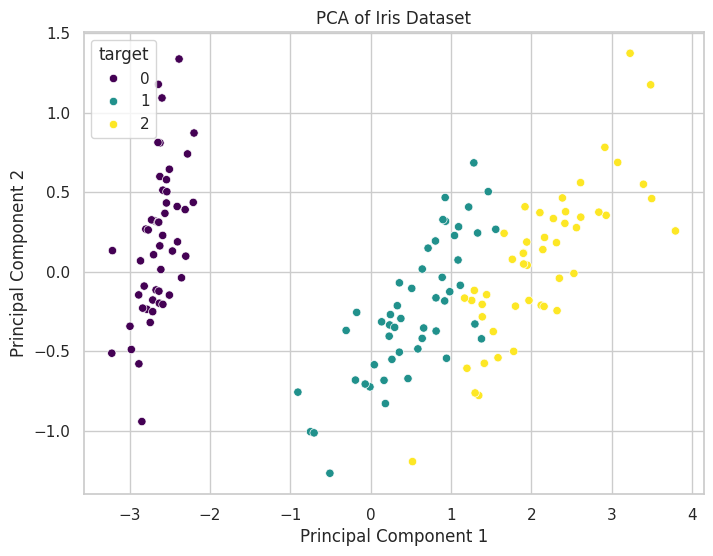

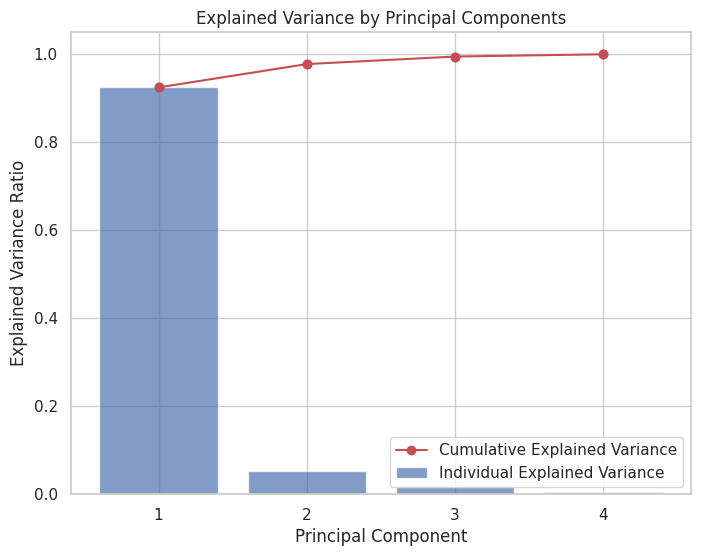

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Standardize the data
features = iris_df.columns[:-1]
x = iris_df.loc[:, features].values
y = iris_df.loc[:, ['target']].values

# Apply PCA
pca = PCA(n_components=4)  # Use all components to see the full explained variance
principal_components = pca.fit_transform(x)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components[:, :2], columns=['PC1', 'PC2'])
pca_df['target'] = iris_df['target']

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='viridis')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the explained variance
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, align='center', label='Individual Explained Variance')
cumulative_variance = pca.explained_variance_ratio_.cumsum()
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='r', label='Cumulative Explained Variance')
plt.scatter(range(1, len(cumulative_variance) + 1), cumulative_variance, color='r')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.legend(loc='best')
plt.grid(True)
plt.show()

### 5. Simple Machine Learning Correlations

provides insights into which features contribute most to the model's predictions. Features with higher importance scores are more influential in distinguishing between species, guiding feature selection and understanding the dataset's predictive characteristics.

Feature ranking:
1. petal length (cm) (0.4361)
2. petal width (cm) (0.4361)
3. sepal length (cm) (0.1061)
4. sepal width (cm) (0.0217)


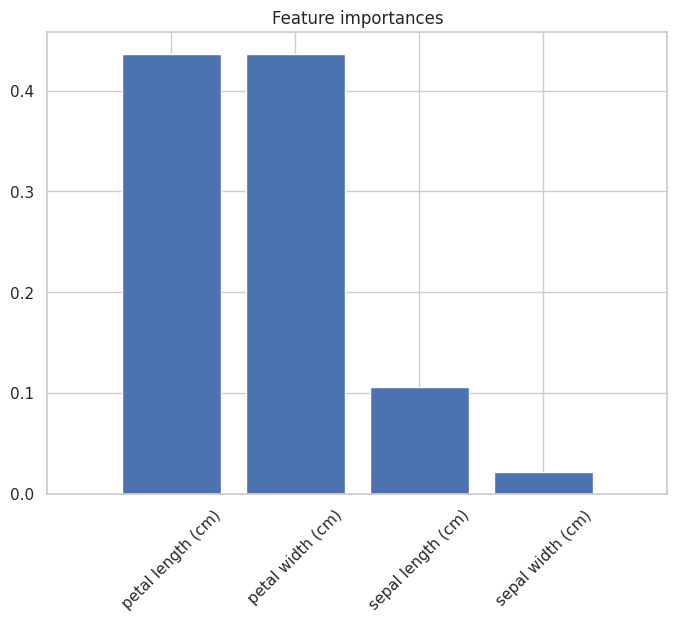

In [10]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x, y.ravel())

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print(f"{f + 1}. {features[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), [features[i] for i in indices], rotation=45)
plt.xlim([-1, x.shape[1]])
plt.show()

## 6. Correlation Coefficient Heatmap and Pairplot

By examining these plots, you can identify correlations, clusters, and patterns that may exist between features and target species, aiding in understanding the dataset's structure and potential interactions.

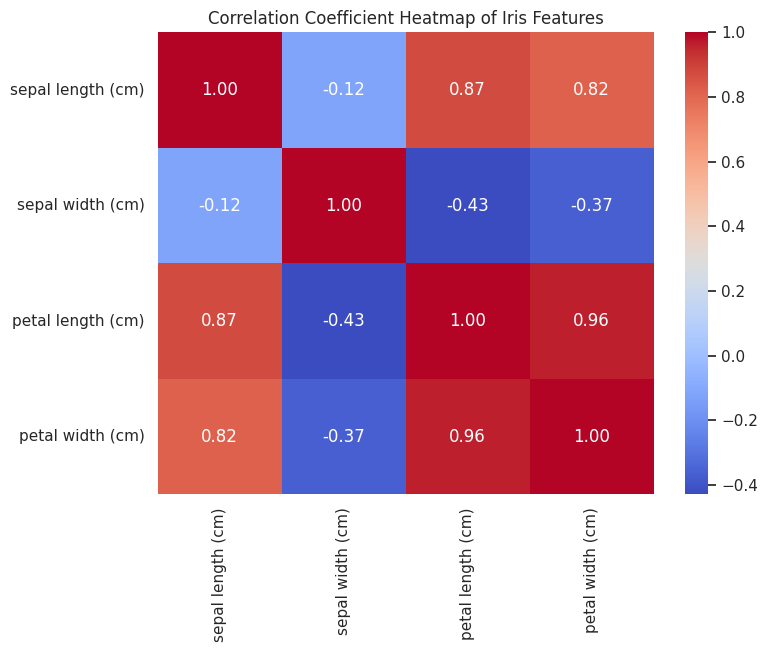

In [16]:
# Calculate the correlation matrix
correlation_matrix = iris_df.iloc[:, :-1].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Coefficient Heatmap of Iris Features')
plt.show()

In a pairplot, you examine the scatter plots of all possible feature combinations to assess how well-separated the groups (e.g., species in the Iris dataset) are.

Well-separated clusters in these plots suggest that the features are effective for distinguishing between groups, whereas significant overlap indicates that the features may not be as useful for classification.

The diagonal plots in a pairplot show how each feature is distributed across different groups. For the Iris dataset, petal length and petal width have clear, distinct distributions between species. This agree with the features importances and have a strong correlation with each other (see the above plots and analysis).

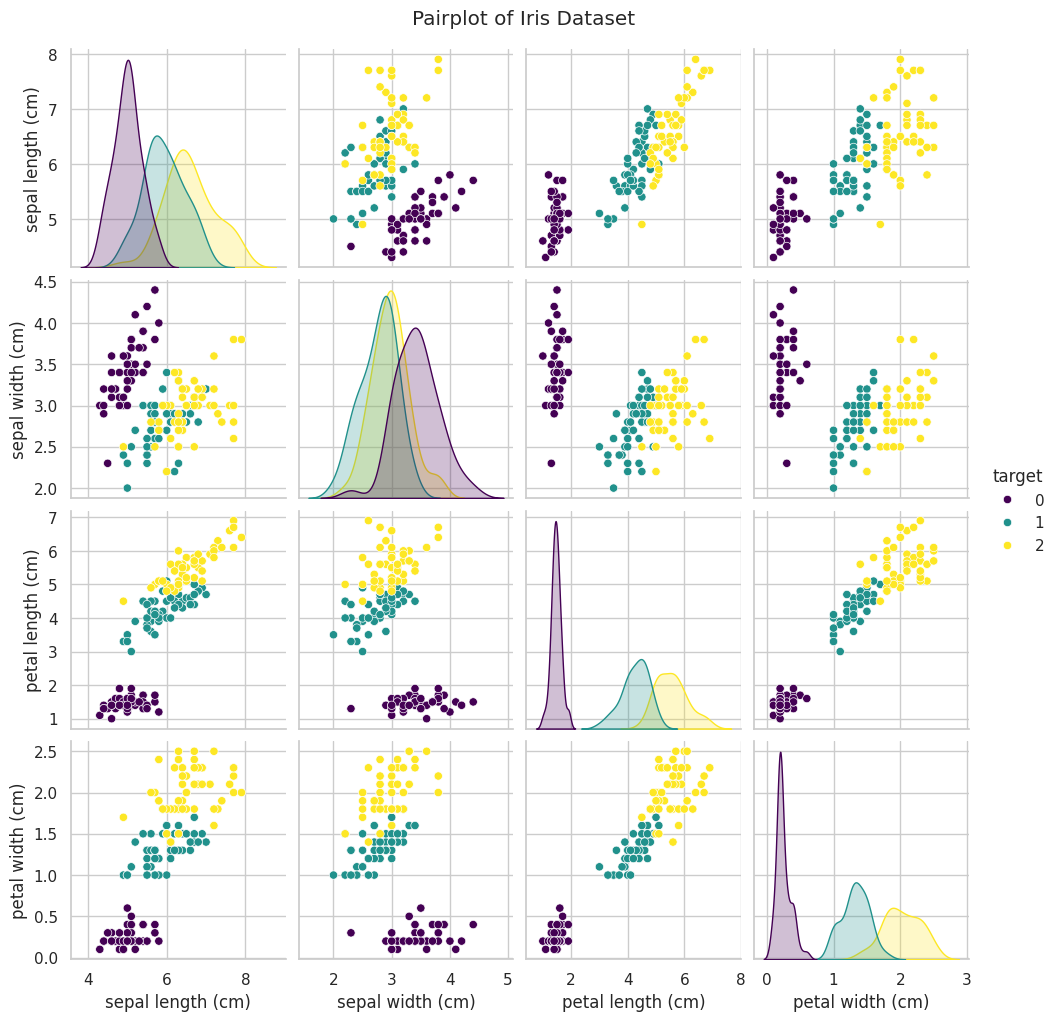

In [15]:
# Create a pairplot
sns.pairplot(iris_df, hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()